# Linear Regression Model

### Importing libraries and reading the Boston Dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Exploration

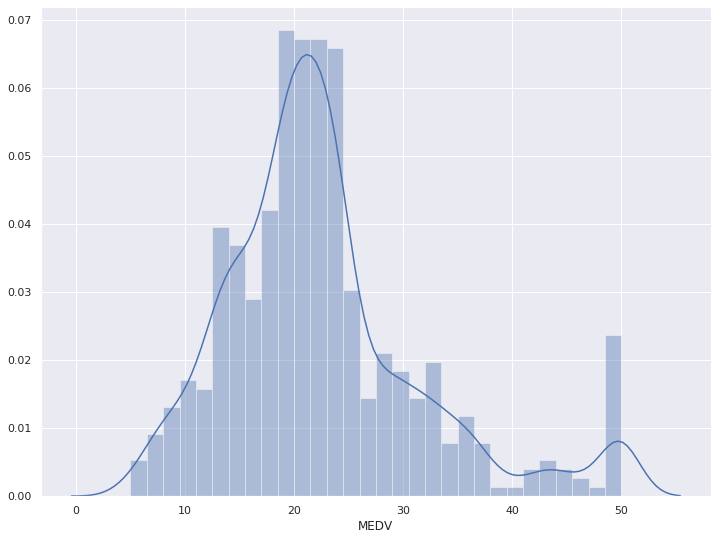

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

## Task 1:

1. Normalizing the data using StandardScaler from sklearn.
2. Splitting the multivariate data into training/validation data (20% validation data) and plotting train error and validation error as a function of the lambda regularizer. 
3. Finding the best value of lambda. 

In [0]:
X= df.drop(['MEDV'], axis=1) #features
y= df["MEDV"] #target

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 0) #Splitting before scaling so the test data is not manipulated

In [0]:
#Scaling the train and test data using properties of only train data
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [0]:
#Introducing bias to both train and test set otherwise the slope will be 0 (not ideal)
bias_train= np.ones((X_train.shape[0], 1))
bias_test= np.ones((X_test.shape[0], 1))
X_train= np.concatenate((bias_train, X_train), axis=1)
X_test= np.concatenate((bias_test, X_test), axis=1)

In [0]:
#Calculating the weights and test and train predictions for different lambdas
f= X_train.shape[1] 
w= pd.DataFrame()
y_pred_test= pd.DataFrame()
y_pred_train= pd.DataFrame()
for i in range(0,200):
  w["Lambda= %f" %i] = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (i)*np.identity(f)), np.dot(X_train.T, y_train))
  y_pred_test["Lambda= %f" %i] = np.dot(X_test, w["Lambda= %f" %i])
  y_pred_train["Lambda= %f" %i] = np.dot(X_train, w["Lambda= %f" %i])

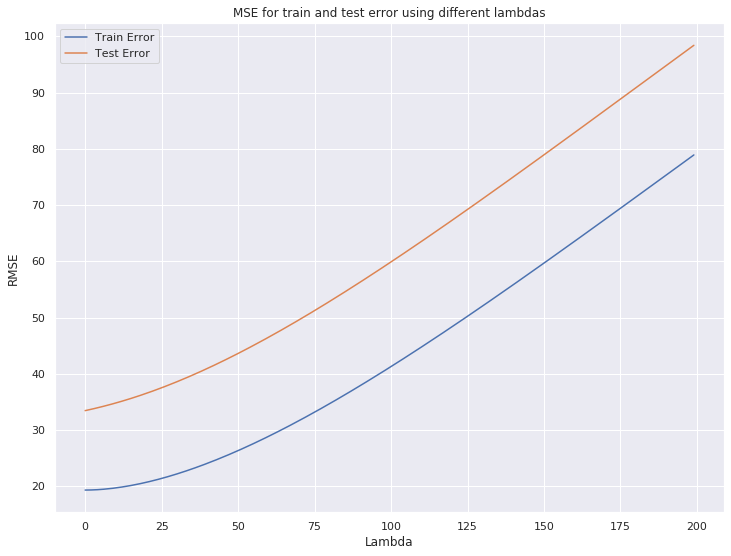

In [0]:
#Calculating and plotting the train and test error (using RMSE)
rmse_train= []
rmse_test= []
for i in range (0,200):
  rmse_train.append(mean_squared_error(y_pred_train.iloc[:,i], y_train))
  rmse_test.append(mean_squared_error(y_pred_test.iloc[:,i], y_test))

plt.plot(rmse_train)
plt.plot(rmse_test)
plt.legend(["Train Error", "Test Error"])
plt.title("MSE for train and test error using different lambdas")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.show()

The best value of lambda seems to be 0. The validation error and train error increases as lambda increases and it is lowest when lambda is equal to 0. This value will be used in the further exercises. This dataset did not require any regularization term to it but it could be useful in some other cases.

A standard least squares model tends to have some variance in it, i.e. the model won’t generalize well for a data set different than its training data. Regularization, significantly reduces the variance of the model, without substantial increase in its bias.

## Task 2:

Deriving the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$.

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

<img src="https://drive.google.com/uc?id=159ZwTOOCxgwFcyKss8kSo5TFAw3ukQ_Y">

## Task 3

1. Implementing batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2

2. Running the gradient descent for a fixed number of epochs (based on convergence) and verifying that the results closely approximate the matrix solution with the same lambda.

In [0]:
#Calculating the weights and predictions for lambda= 0 (matrix solution)
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (0)*np.identity(f)), np.dot(X_train.T, y_train))
y_pred_train= np.dot(X_train, w)
y_pred_test= np.dot(X_test, w)

In [0]:
def Batch_Gradient_Descent (X,y, epochs= 1000, lr= 0.02, convergence= False):
  """This function performs the Batch gradient descent either till convergence or for number of epochs depending on user input. The convergence criteria is set at 0.01"""
  total_cost = []
  new_weights = np.zeros((X.shape[1], 1))
  m = X.shape[0]

  for i in range(epochs):
      y_pred = np.dot(X, new_weights) #getting predictions
      residuals = y_pred - np.array(y).reshape(-1,1) 
      new_weights -= (lr / m) * np.dot(X.T, residuals) #applying the derivative of the cost function to get weights
      cost = np.sum((residuals ** 2)) / (2 * m) #formulating the cost function
      total_cost.append(cost)

      if i>0 and convergence== True and (abs(total_cost[-1]- total_cost[-2]))<= 0.01: #convergence criteria
        break

  return y_pred, new_weights, total_cost

Number of epochs to meet our convergence criteria of 0.01= 181


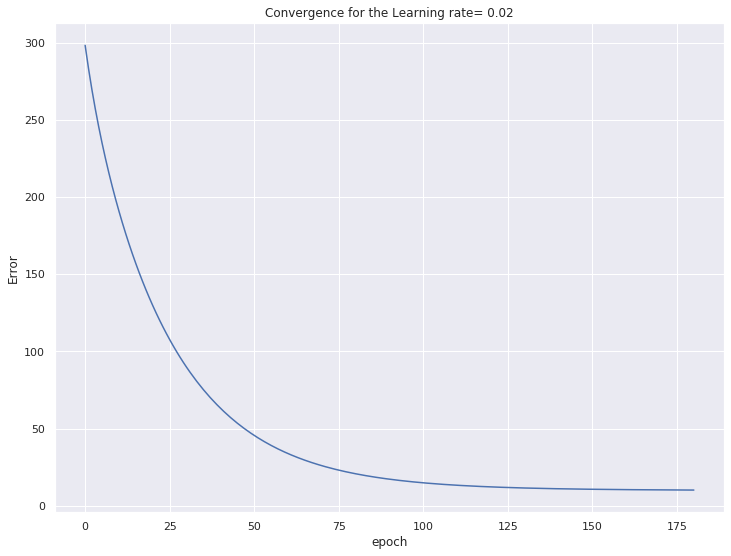

In [0]:
#plotting the gradient batch descent for the train data
pred_train, weights_train, cost_conv= Batch_Gradient_Descent(X_train, y_train, lr= 0.02, convergence= True) #runs till convergence since it is set to true
print("Number of epochs to meet our convergence criteria of 0.01= %d" %len(cost_conv))

plt.plot(cost_conv)
plt.title("Convergence for the Learning rate= 0.02")
plt.xlabel("epoch")
plt.ylabel("Error")
plt.show()

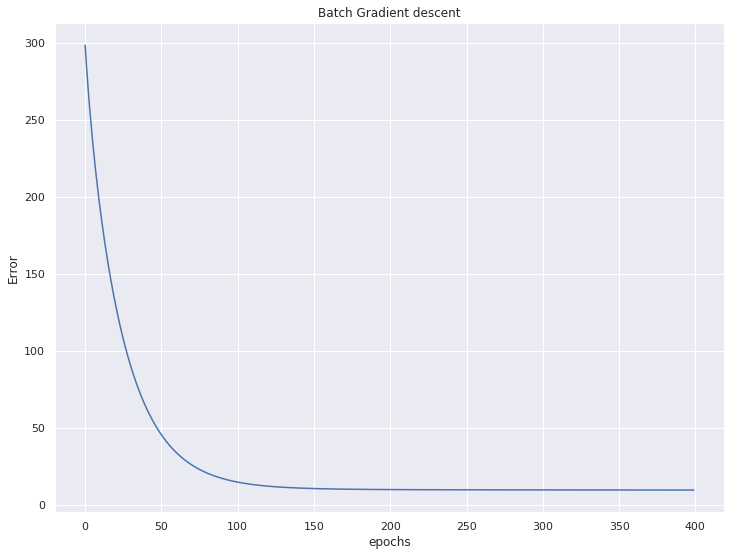

In [0]:
pred_train, weights_train, cost_train= Batch_Gradient_Descent(X_train, y_train, 400) #Does not run till convergence (since it is not defined) but till the number of epochs

plt.plot(cost_train)
plt.title("Batch Gradient descent")
plt.ylabel("Error")
plt.xlabel("epochs")
plt.show()

In [0]:
#Measuring MSE from previous matrix solution of lambda= 0
pred_test= np.dot(X_test, weights_train) #using the same weights to get the results for test data
print("MSE for comparison of the train predictions with the train matrix solution: %0.3f" %mean_squared_error(y_pred_train, pred_train))
print("MSE for comparison of the validation predictions with the validation matrix solution: %0.3f" %mean_squared_error(y_pred_test, pred_test))

MSE for comparison of the train predictions with the train matrix solution: 0.316
MSE for comparison of the validation predictions with the validation matrix solution: 0.413


## Task 4:

Plotting training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line.

In [0]:
learning_rate= [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1] #different learning rates
learning_rates_cost= []
for i in learning_rate:
  pred_train, weights_train, cost_train= Batch_Gradient_Descent(X_train, y_train, 1000, i) #using the same function defined in Question 3, 1000 iterations as per instructions
  learning_rates_cost.append(cost_train)

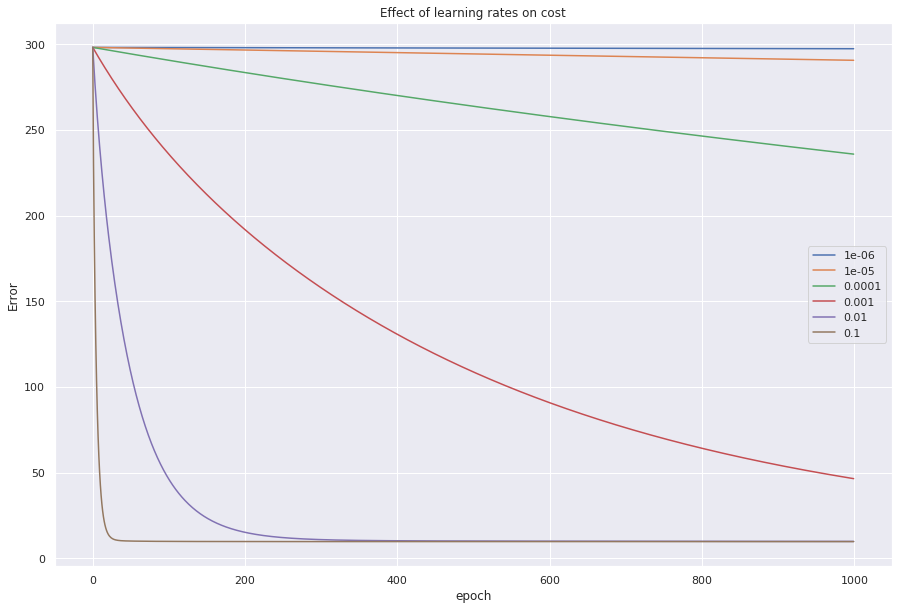

In [0]:
#Plotting the cost function for different learning rates
plt.figure(figsize=(15,10))
for i in range (0, len(learning_rate)):
  plt.plot(learning_rates_cost[i], label= learning_rate[i])

plt.title("Effect of learning rates on cost")
plt.xlabel("epoch")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()  

Learning rates of 1e-6, 1e-5, 1e-4 are taking very long to converge as expected whereas the convergence happens quicker for higher learning rates. Learning rate of 0.1 seems to be converging too quickly and not decreasing on each epoch. 
From this plot, a learning rate of 0.01 seems to be the best option.

## Task 5:

Implementing a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

Choosing B=1, B=16, B=128, B=256, and B=#data points and plotting training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B.

In [0]:
def minibatchGradientDescent(X, y, lr=0.01, iterations=20, λ=0, bs=1):
  '''
  X, y: training data
  lr: learning rate
  iteration: number of epochs
  λ: regularization parameter
  bs: batch size'''

  # m is the nunmber of data points
  m, n = X.shape
  np.random.seed(42)
  w = np.random.randn(n, 1)
  costHistory = [] #saving cost
  timeHistory = [] #saving time difference
  updateHistory = [] #saving gradient updates
  update= 0 #counter for updates
  total_time= 0 #counter for time

  for i in range(iterations):  #loop for each epoch 
    '''
    1. Store the current time
    2. Randomize your X and y. Make sure they are
    You may want to use np.random.permutation
    '''
    current_time= time.time()
    np.random.seed(42)
    X= np.random.permutation(X)
    np.random.seed(42)
    y= np.random.permutation(y)

    for j in range(0, m, bs): #loop for mini batch depending on the batch size
      '''
      1. Get the current mini-batch of X and Y
      2. Calculate the current prediction
      3. Update the weight (You may want to use np.dot)
      The update is similar to Q4
      '''
      X_mini= X[j:bs+j]
      y_mini= y[j:bs+j]
      y_pred = np.dot(X_mini, w)
      residuals = y_pred - np.array(y_mini).reshape(-1,1)
      w -= (lr / bs) * np.dot(X_mini.T, residuals) #dividing the weights by the batch size 
      update +=1
      
    '''
    1. calculate the current cost using w, X and y
    2. store the current time and calculate the time difference
    3. store time difference and cost in costHistory and timeHistory
    '''

    y_pred = np.dot(X, w)
    residuals = y_pred - np.array(y).reshape(-1,1)
    cost = np.sum((residuals ** 2)) / (2*m) #Mean sqaured error
    new_time= time.time()

    total_time += (new_time-current_time)
    timeHistory.append(total_time)
    updateHistory.append(update)
    costHistory.append(cost)

  return w, costHistory, timeHistory, updateHistory

In [0]:
batch_cost, batch_time, batch_update= [],[],[] #to save the cost, time and updates for the different batches
batch_sizes= [1, 16, 128, 256, X_train.shape[0]] #batch sizes
for i in batch_sizes:
  mini_weights, mini_cost, mini_time, mini_update= minibatchGradientDescent(X_train, y_train, iterations= 20, bs=i) #calling the function for the different batch sizes for 20 iterations as per instructions
  batch_cost.append(mini_cost)
  batch_time.append(mini_time)
  batch_update.append(mini_update)

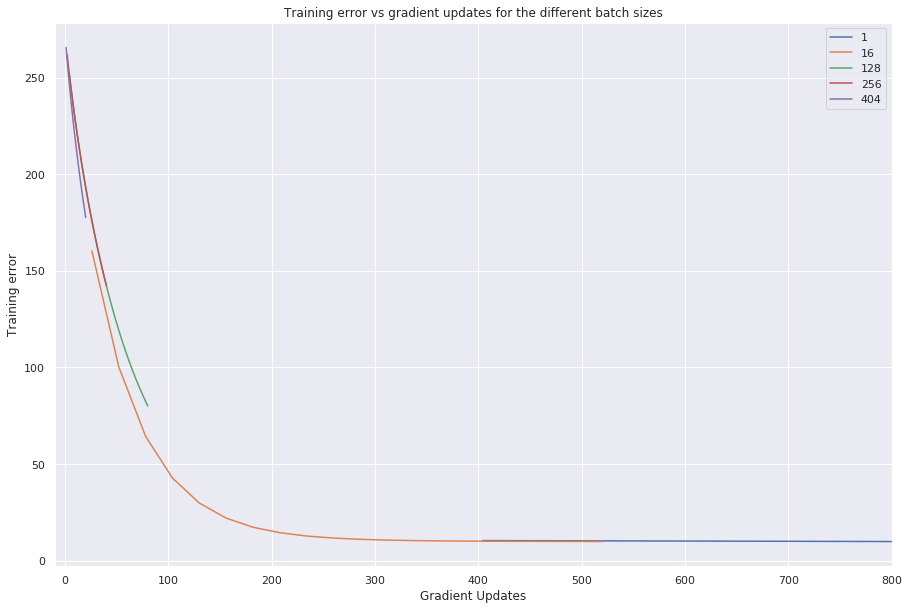

In [0]:
#plotting the cost vs update
plt.figure(figsize=(15,10))
for i in range (0, len(batch_sizes)):
  plt.plot(batch_update[i], batch_cost[i], label= batch_sizes[i])

plt.legend()
plt.title("Training error vs gradient updates for the different batch sizes")
plt.xlim((-10,800))
plt.xlabel("Gradient Updates")
plt.ylabel("Training error")
plt.show()

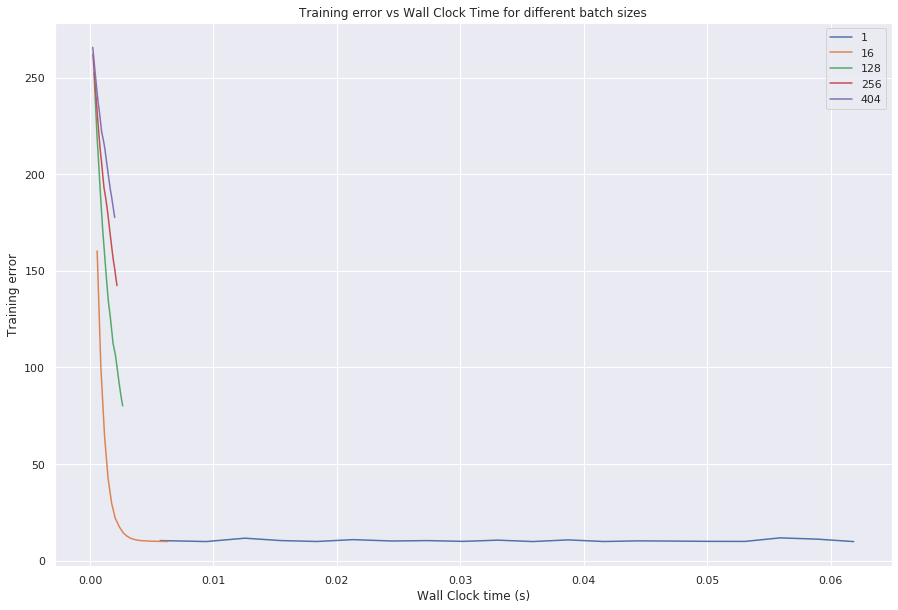

In [0]:
#plotting wall clock time vs training error
plt.figure(figsize=(15,10))
for i in range (0, len(batch_sizes)):
  plt.plot(batch_time[i], batch_cost[i], label= batch_sizes[i])

plt.legend()
plt.title("Training error vs Wall Clock Time for different batch sizes")
plt.xlabel("Wall Clock time (s)")
plt.ylabel("Training error")
plt.show()

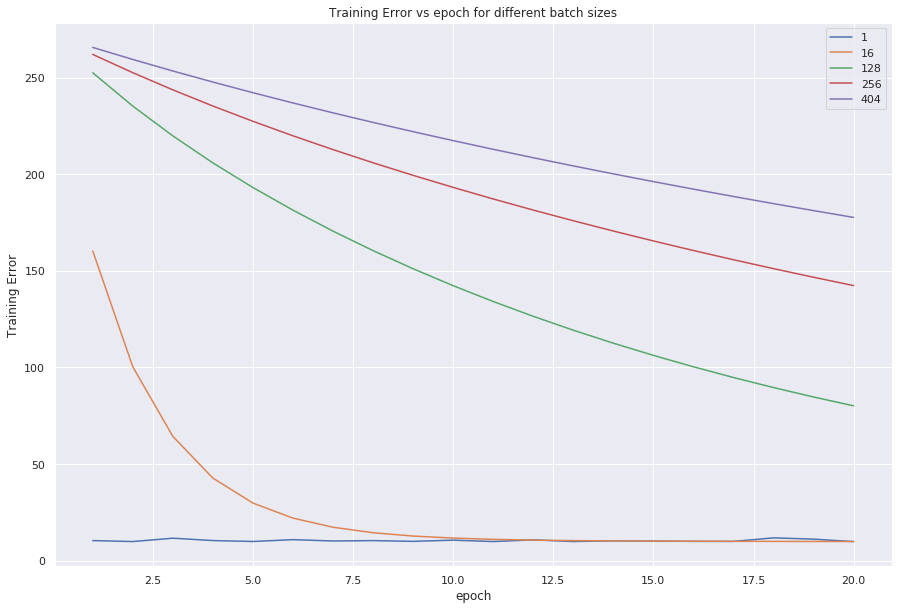

In [0]:
#plotting the training error against the number of epochs (20)
plt.figure(figsize=(15,10))
for i in range (0, len(batch_sizes)):
  plt.plot(range(1,21),batch_cost[i], label= batch_sizes[i])

plt.legend()
plt.title("Training Error vs epoch for different batch sizes")
plt.xlabel("epoch")
plt.ylabel("Training Error")
plt.show()

It is evident from the first two graphs in this question that the lower batch sizes converges in less gradient updates. This is mainly because they have higher weight updates per iteration. For example, for a batch size of 1, the weight is updated 404 times per iteration and the error is already at a lower value from the first point. 

For the batch size of 404 (which is batch gradient descent done earlier in Q3), it converges in approximately 180 epochs whereas the stochastic gradient descent converges in 1 iteration. 

The time taken for the lower batch sizes is higher overall which makes sense since there is relatively more computation for the lower batch sizes (since updating of the weights happen more often per iteration).

The final graph repeats the above points where the batch size of 1 starts from the convergence point. The batch size of 16 converges in 10 epochs.

In this case, a batch size of 16 works best in terms of gradient updates and wall clock time. It converges in 200 gradient updates and in less than 0.01 seconds. It converges in lower gradient updates compared to a batch size of 404 and quicker than the batch size of 1. The differences are not too large compared to stochastic gradient descent. In general, batching is very useful specially in cases where the dataset is too large.

## Task 6:

1. Switching to absolute error for loss but still using $L_2$ regularization. Deriving the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$.


2. Tuning $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).

<img src="https://drive.google.com/uc?id=1TD8tjCW2B75jWbCmE-UTgUKaHpG-Ukqg">

In [0]:
def absolute_minibatchGradientDescent(X, y, lr=0.01, iterations=20, λ=0, bs=1):
  '''
  X, y: training data
  w: weights
  lr: learning rate
  iteration: number of epochs
  λ: regularization parameter
  bs: batch size'''

  # m is the nunmber of data points
  m, n = X.shape
  # these are used to stored the cost and time
  np.random.seed(42)
  w = np.random.randn(n, 1) 
  costHistory = [] #saving cost
  timeHistory = [] #saving time difference
  updateHistory = [] #saving gradient updates
  update= 0 #counter for updates
  total_time= 0 #counter for time

  for i in range(iterations):   
    '''
    1. Store the current time
    2. Randomize your X and y. Make sure they are
    You may want to use np.random.permutation
    '''
    current_time= time.time()
    np.random.seed(42)
    X= np.random.permutation(X)
    np.random.seed(42)
    y= np.random.permutation(y)

    for j in range(0, m, bs):
      '''
      1. Get the current mini-batch of X and Y
      2. Calculate the current prediction
      3. Update the weight (You may want to use np.dot)
      The update is similar to Q4
      '''
      X_mini= X[j:bs+j]
      y_mini= y[j:bs+j]
      y_pred = np.dot(X_mini, w)
      residuals = y_pred - np.array(y_mini).reshape(-1,1)
      w = w- (lr * (1/bs) * np.dot(X_mini.T, residuals/abs(residuals))) #using the derivation from Part 1
      update +=1
      
    '''
    1. calculate the current cost using w, X and y
    2. store the current time and calculate the time difference
    3. store time difference and cost in costHistory and timeHistory
    '''

    y_pred = np.dot(X, w)
    residuals = y_pred - np.array(y).reshape(-1,1)
    cost = np.sum((residuals ** 2)) / (2*m) #Mean sqaured error to compare abosolute and squared loss functions
    new_time= time.time()

    total_time += new_time-current_time
    costHistory.append(cost)
    timeHistory.append(total_time)
    updateHistory.append(update)

  return w, costHistory, timeHistory, updateHistory

In [0]:
learning_rate= [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
learning_rates_cost= []
for i in learning_rate:
  mini_weights, mini_cost, mini_time, mini_update= absolute_minibatchGradientDescent(X_train, y_train, lr= i, iterations= 100, bs=100)
  learning_rates_cost.append(mini_cost)

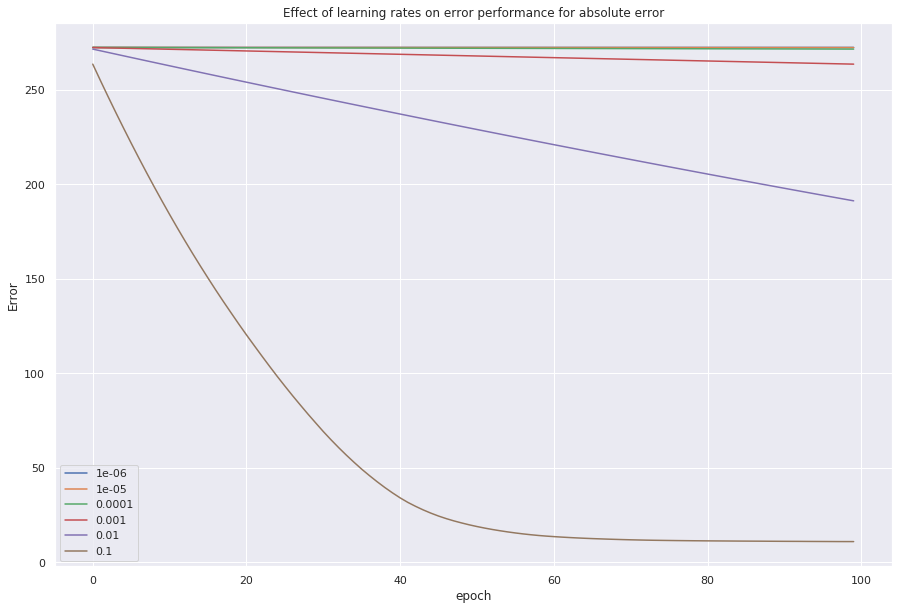

In [0]:
#learning rates for the absolute error
plt.figure(figsize=(15,10))
for i in range (0, len(learning_rate)):
  plt.plot(learning_rates_cost[i], label= learning_rate[i])

plt.title("Effect of learning rates on error performance for absolute error")
plt.xlabel("epoch")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()  

learning rate of 0.1 seems to be the best in this case. However, we will be using 0.01 to be able to compare q5 and q6.

To compare between the absolute and squared error, we will be doing the gradient descent for 20 iterations.

In [0]:
#Utilizing the mini batch gradient descent for the absolute error
batch_cost, batch_time, batch_update= [],[],[]
batch_sizes= [1, 16, 128, 256, X_train.shape[0]]
for i in batch_sizes:
  mini_weights, mini_cost, mini_time, mini_update= absolute_minibatchGradientDescent(X_train, y_train, iterations= 20, bs=i) #iterations chosen to see when it converges
  batch_cost.append(mini_cost)
  batch_time.append(mini_time)
  batch_update.append(mini_update)

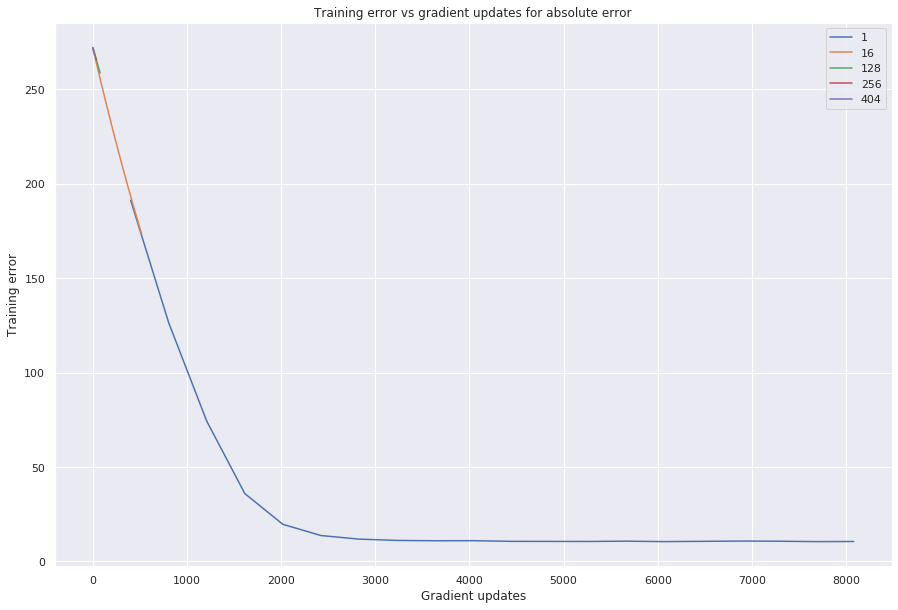

In [0]:
#plotting the batch sizes vs training error
plt.figure(figsize=(15,10))
for i in range (0, len(batch_sizes)):
  plt.plot(batch_update[i],batch_cost[i], label= batch_sizes[i])

plt.legend()
plt.title("Training error vs gradient updates for absolute error")
plt.xlabel("Gradient updates")
plt.ylabel("Training error")
plt.show()

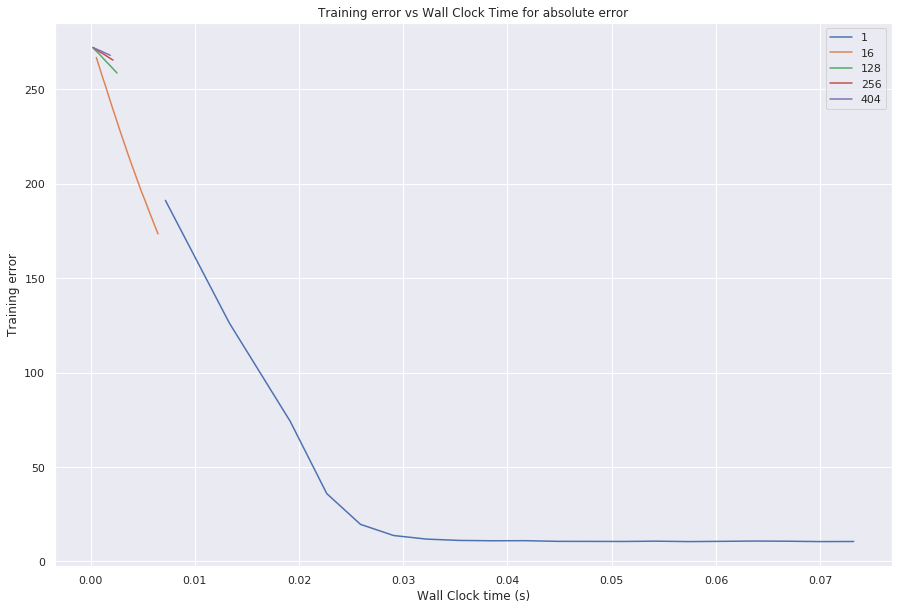

In [0]:
#plotting wall clock time vs training error
plt.figure(figsize=(15,10))
for i in range (0, len(batch_sizes)):
  plt.plot(batch_time[i], batch_cost[i], label= batch_sizes[i])

plt.legend()
plt.title("Training error vs Wall Clock Time for absolute error")
plt.xlabel("Wall Clock time (s)")
plt.ylabel("Training error")
plt.show()

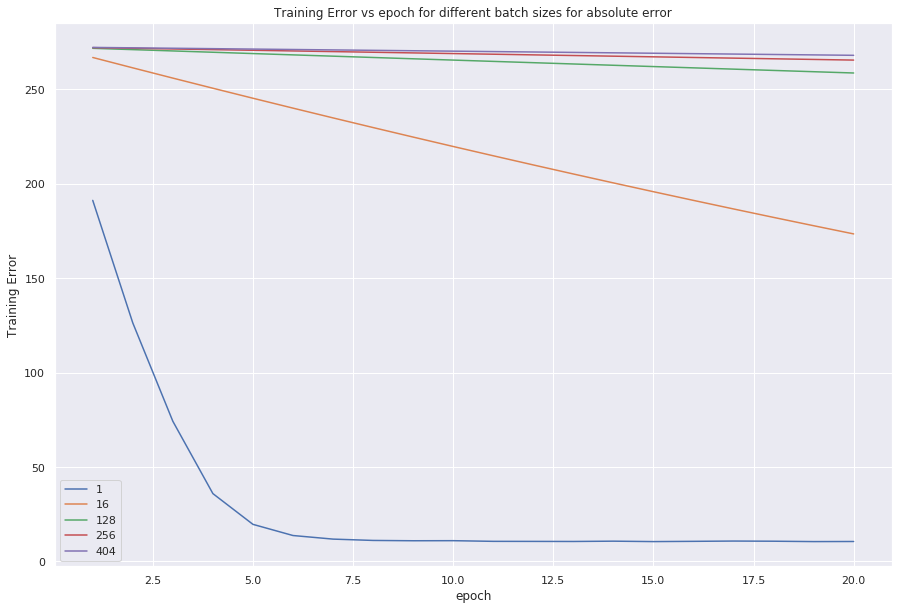

In [0]:
#plotting the training error against the number of epochs (20)
plt.figure(figsize=(15,10))
for i in range (0, len(batch_sizes)):
  plt.plot(range(1,21),batch_cost[i], label= batch_sizes[i])

plt.legend()
plt.title("Training Error vs epoch for different batch sizes for absolute error")
plt.xlabel("epoch")
plt.ylabel("Training Error")
plt.show()

In this particular case, the batch size of 1 seems to be the best option.

Comparison between Squared Error loss and Absolute Error loss:
- The errors does not reduce as quickly for the absolute error loss method compared to the squared error loss. This is evident since the batch size of 16 converged in 200 gradient updates for the squared error loss but did not converge at all for the absolute error loss. The stochastic gradient descent also starts from a higher number for the absolute error loss compared to 0 (for the squared error loss). 
- The wall clock time takes longer for the absolute error loss method as well whereas only one of the batch sizes converged. For absolute error loss, the quickest convergence time was 0.03 seconds where it is less than 0.01 seconds for the squared error loss. This could be vital when the data size is larger.

- Absolute error loss method also does not converge for many of the learning rates as compared to squared error less. It is more sensitive to the right value of learning rate. Note that a learning rate of 0.1 for the absolute error loss would have yielded better results.

In light of these findings, training is easier for the loss function with squared error rather than Absolute Error. The reasons were verified by research as noted next.

Further research:
- Absolute error loss function is not differentiable and continuous at each point whereas squared error loss function is differentiable, continous and convex. These three properties are always desirable in loss functions.

- Taking average squared errors has some interesting implications for squared error loss. Since the errors are squared before they are averaged, the squared error loss gives a relatively high weight to large errors. This means the squared error loss should be more useful when large errors are particularly undesirable. This makes the squared error loss fairly easier to train when compared to the absolute error loss.

- In short, using the squared error is easier to solve and train, but using the absolute error is more robust to outliers.

- If we only had to give one prediction for all the observations that try to minimize squared error, then that prediction should be the mean of all target values. But if we try to minimize asbolute error, that prediction would be the median of all observations. The median is more robust to outliers than mean, which consequently makes asbolute error more robust to outliers than squared error.
